<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-training-sample" data-toc-modified-id="Load-training-sample-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load training sample</a></span></li><li><span><a href="#Plot-numeric-distributions-and-correlations" data-toc-modified-id="Plot-numeric-distributions-and-correlations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot numeric distributions and correlations</a></span></li><li><span><a href="#Train-test-split" data-toc-modified-id="Train-test-split-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Train-test split</a></span></li><li><span><a href="#Weights" data-toc-modified-id="Weights-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Weights</a></span></li><li><span><a href="#Pipeline-for-Random-search-of-the-best-model" data-toc-modified-id="Pipeline-for-Random-search-of-the-best-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Pipeline for Random search of the best model</a></span></li><li><span><a href="#Best-estimator" data-toc-modified-id="Best-estimator-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Best estimator</a></span></li><li><span><a href="#Feature-importance,-score,-confusion-matrix" data-toc-modified-id="Feature-importance,-score,-confusion-matrix-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Feature importance, score, confusion matrix</a></span></li><li><span><a href="#Undersampling-and-Oversampling" data-toc-modified-id="Undersampling-and-Oversampling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Undersampling and Oversampling</a></span></li></ul></div>

In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
from io import BytesIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, plot_confusion_matrix, classification_report, precision_recall_curve
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from typing import Dict, Tuple, Callable
from matplotlib import style
style.use('fivethirtyeight')

import os
import sys

sys.path.insert(0, os.path.abspath('Data-Science-Bootcamp-Challenges/utils/'))
import functions

plt.rcParams["figure.figsize"] = (18, 10)  # Change matplotlib Box Size
plt.rcParams["font.size"] = 20  # Change matplotlib Font Size

/Users/andrea/anaconda3/envs/propy_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


# Load training sample

In [9]:
features_train = pd.read_csv('data/features_train.csv')
target_train = pd.read_csv('data/target_train.csv')

In [10]:
features_train.head()

Id         0          1           2         3         4          5  \
0   0  2.837292   6.876604  148.413159  2.443542  0.190717  -0.879899   
1   1  0.518260  -8.371805    0.315937  0.343454  0.034839 -19.706822   
2   2  1.839812   6.058536    0.496923  0.457393  0.072552  24.958362   
3   3  0.199051  -8.538115    0.702203  4.089831  0.793226  -0.464069   
4   4  1.069817 -18.055101    0.082204  0.722185  0.028962  -0.673198   

          6          7         8  ...        114       115       116  \
0  0.264097  16.627731  5.405047  ... -13.649896  0.300928  3.704019   
1  3.333765   3.060854  0.113361  ...  -5.548846  0.656999  2.376066   
2  0.262037   0.003101  1.381296  ...  -6.460650  0.983519 -5.509158   
3  0.408070   3.116768  0.763159  ...   3.371071  0.986737  0.246915   
4  0.029112  74.009726  2.486090  ...  -4.010314  0.013075 -3.205036   

        117       118       119       120       121        122       123  
0  0.578452  0.523759  0.116409  0.675754  0.016312 -31.767016  2.008720  
1  0.733390  0.467810  0.807791 -0.075898  0.009148  -4.784145  2.548898  
2  0.272007  0.579664  0.848760  0.257566  1.770071 -82.086643  0.676950  
3  0.217022  0.311443  0.683373  0.885297  0.189745  24.827932  0.996090  
4  0.575523  0.279407  0.724725 -0.143733  3.295446   1.040429  1.612572  

[5 rows x 125 columns]

In [11]:
len(features_train)

15000

In [12]:
target_train.head()

Id  Expected
0   0         2
1   1         1
2   2         2
3   3         2
4   4         1

In [13]:
len(target_train)

15000

In [14]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 125 entries, Id to 123
dtypes: float64(124), int64(1)
memory usage: 14.3 MB


In [15]:
describe = features_train.describe()
describe.head()
for col in describe.columns:
     print(f'{col} {describe[col]}')

Id count    15000.000000
mean      7499.500000
std       4330.271354
min          0.000000
25%       3749.750000
50%       7499.500000
75%      11249.250000
max      14999.000000
Name: Id, dtype: float64
0 count    15000.000000
mean         1.678557
std          2.196503
min          0.027231
25%          0.519934
50%          1.008744
75%          1.980643
max         36.313358
Name: 0, dtype: float64
1 count    15000.000000
mean         0.030627
std         10.000407
min        -38.131450
25%         -6.655182
50%          0.052109
75%          6.751920
max         38.561070
Name: 1, dtype: float64
2 count    15000.000000
mean        13.286616
std         34.157635
min          0.000004
25%          0.079471
50%          0.634129
75%          5.251502
max        148.413159
Name: 2, dtype: float64
3 count    15000.000000
mean         1.678258
std          2.206747
min          0.018664
25%          0.520101
50%          1.003423
75%          1.982391
max         56.304413
Name: 3, dty

In [16]:
features_train.dtypes

Id       int64
0      float64
1      float64
2      float64
3      float64
        ...   
119    float64
120    float64
121    float64
122    float64
123    float64
Length: 125, dtype: object

In [17]:
data_train = pd.merge(features_train, target_train, on='Id')

In [18]:
data_train.head()

Id         0          1           2         3         4          5  \
0   0  2.837292   6.876604  148.413159  2.443542  0.190717  -0.879899   
1   1  0.518260  -8.371805    0.315937  0.343454  0.034839 -19.706822   
2   2  1.839812   6.058536    0.496923  0.457393  0.072552  24.958362   
3   3  0.199051  -8.538115    0.702203  4.089831  0.793226  -0.464069   
4   4  1.069817 -18.055101    0.082204  0.722185  0.028962  -0.673198   

          6          7         8  ...       115       116       117       118  \
0  0.264097  16.627731  5.405047  ...  0.300928  3.704019  0.578452  0.523759   
1  3.333765   3.060854  0.113361  ...  0.656999  2.376066  0.733390  0.467810   
2  0.262037   0.003101  1.381296  ...  0.983519 -5.509158  0.272007  0.579664   
3  0.408070   3.116768  0.763159  ...  0.986737  0.246915  0.217022  0.311443   
4  0.029112  74.009726  2.486090  ...  0.013075 -3.205036  0.575523  0.279407   

        119       120       121        122       123  Expected  
0  0.116409  0.675754  0.016312 -31.767016  2.008720         2  
1  0.807791 -0.075898  0.009148  -4.784145  2.548898         1  
2  0.848760  0.257566  1.770071 -82.086643  0.676950         2  
3  0.683373  0.885297  0.189745  24.827932  0.996090         2  
4  0.724725 -0.143733  3.295446   1.040429  1.612572         1  

[5 rows x 126 columns]

In [19]:
data_train.dtypes

Id            int64
0           float64
1           float64
2           float64
3           float64
             ...   
120         float64
121         float64
122         float64
123         float64
Expected      int64
Length: 126, dtype: object

# Plot numeric distributions and correlations

In [57]:
def plot_numeric_distrib(data, target, target_labels, ncols, nrows, figsize):
    color = ['b', 'r']
    vars_ = data.columns
    c = 0
    figure = plt.figure(figsize=figsize)
    for v in vars_:
        ax = plt.subplot(nrows, ncols, c + 1)
        df = data[data[target] == target_labels[0]]
        _, nbins, _ = plt.hist(df[v], 40, color='g', alpha=0.5, label=target_labels[0])
        cc = 0
        for lbl in target_labels[1:]:
            df = data[data[target] == lbl]
            plt.hist(df[v], bins=nbins, color=color[cc], alpha=0.5, label=lbl)
            cc = cc+1
        plt.xlabel(v)
        plt.legend(loc='best')
        c = c + 1
#     plt.savefig('plots/variables_distributions.png')
    plt.show()

plot_numeric_distrib(data_train, 'Expected', [0, 1, 2],  6, 21, (120, 300))

<Figure size 1296x720 with 0 Axes>

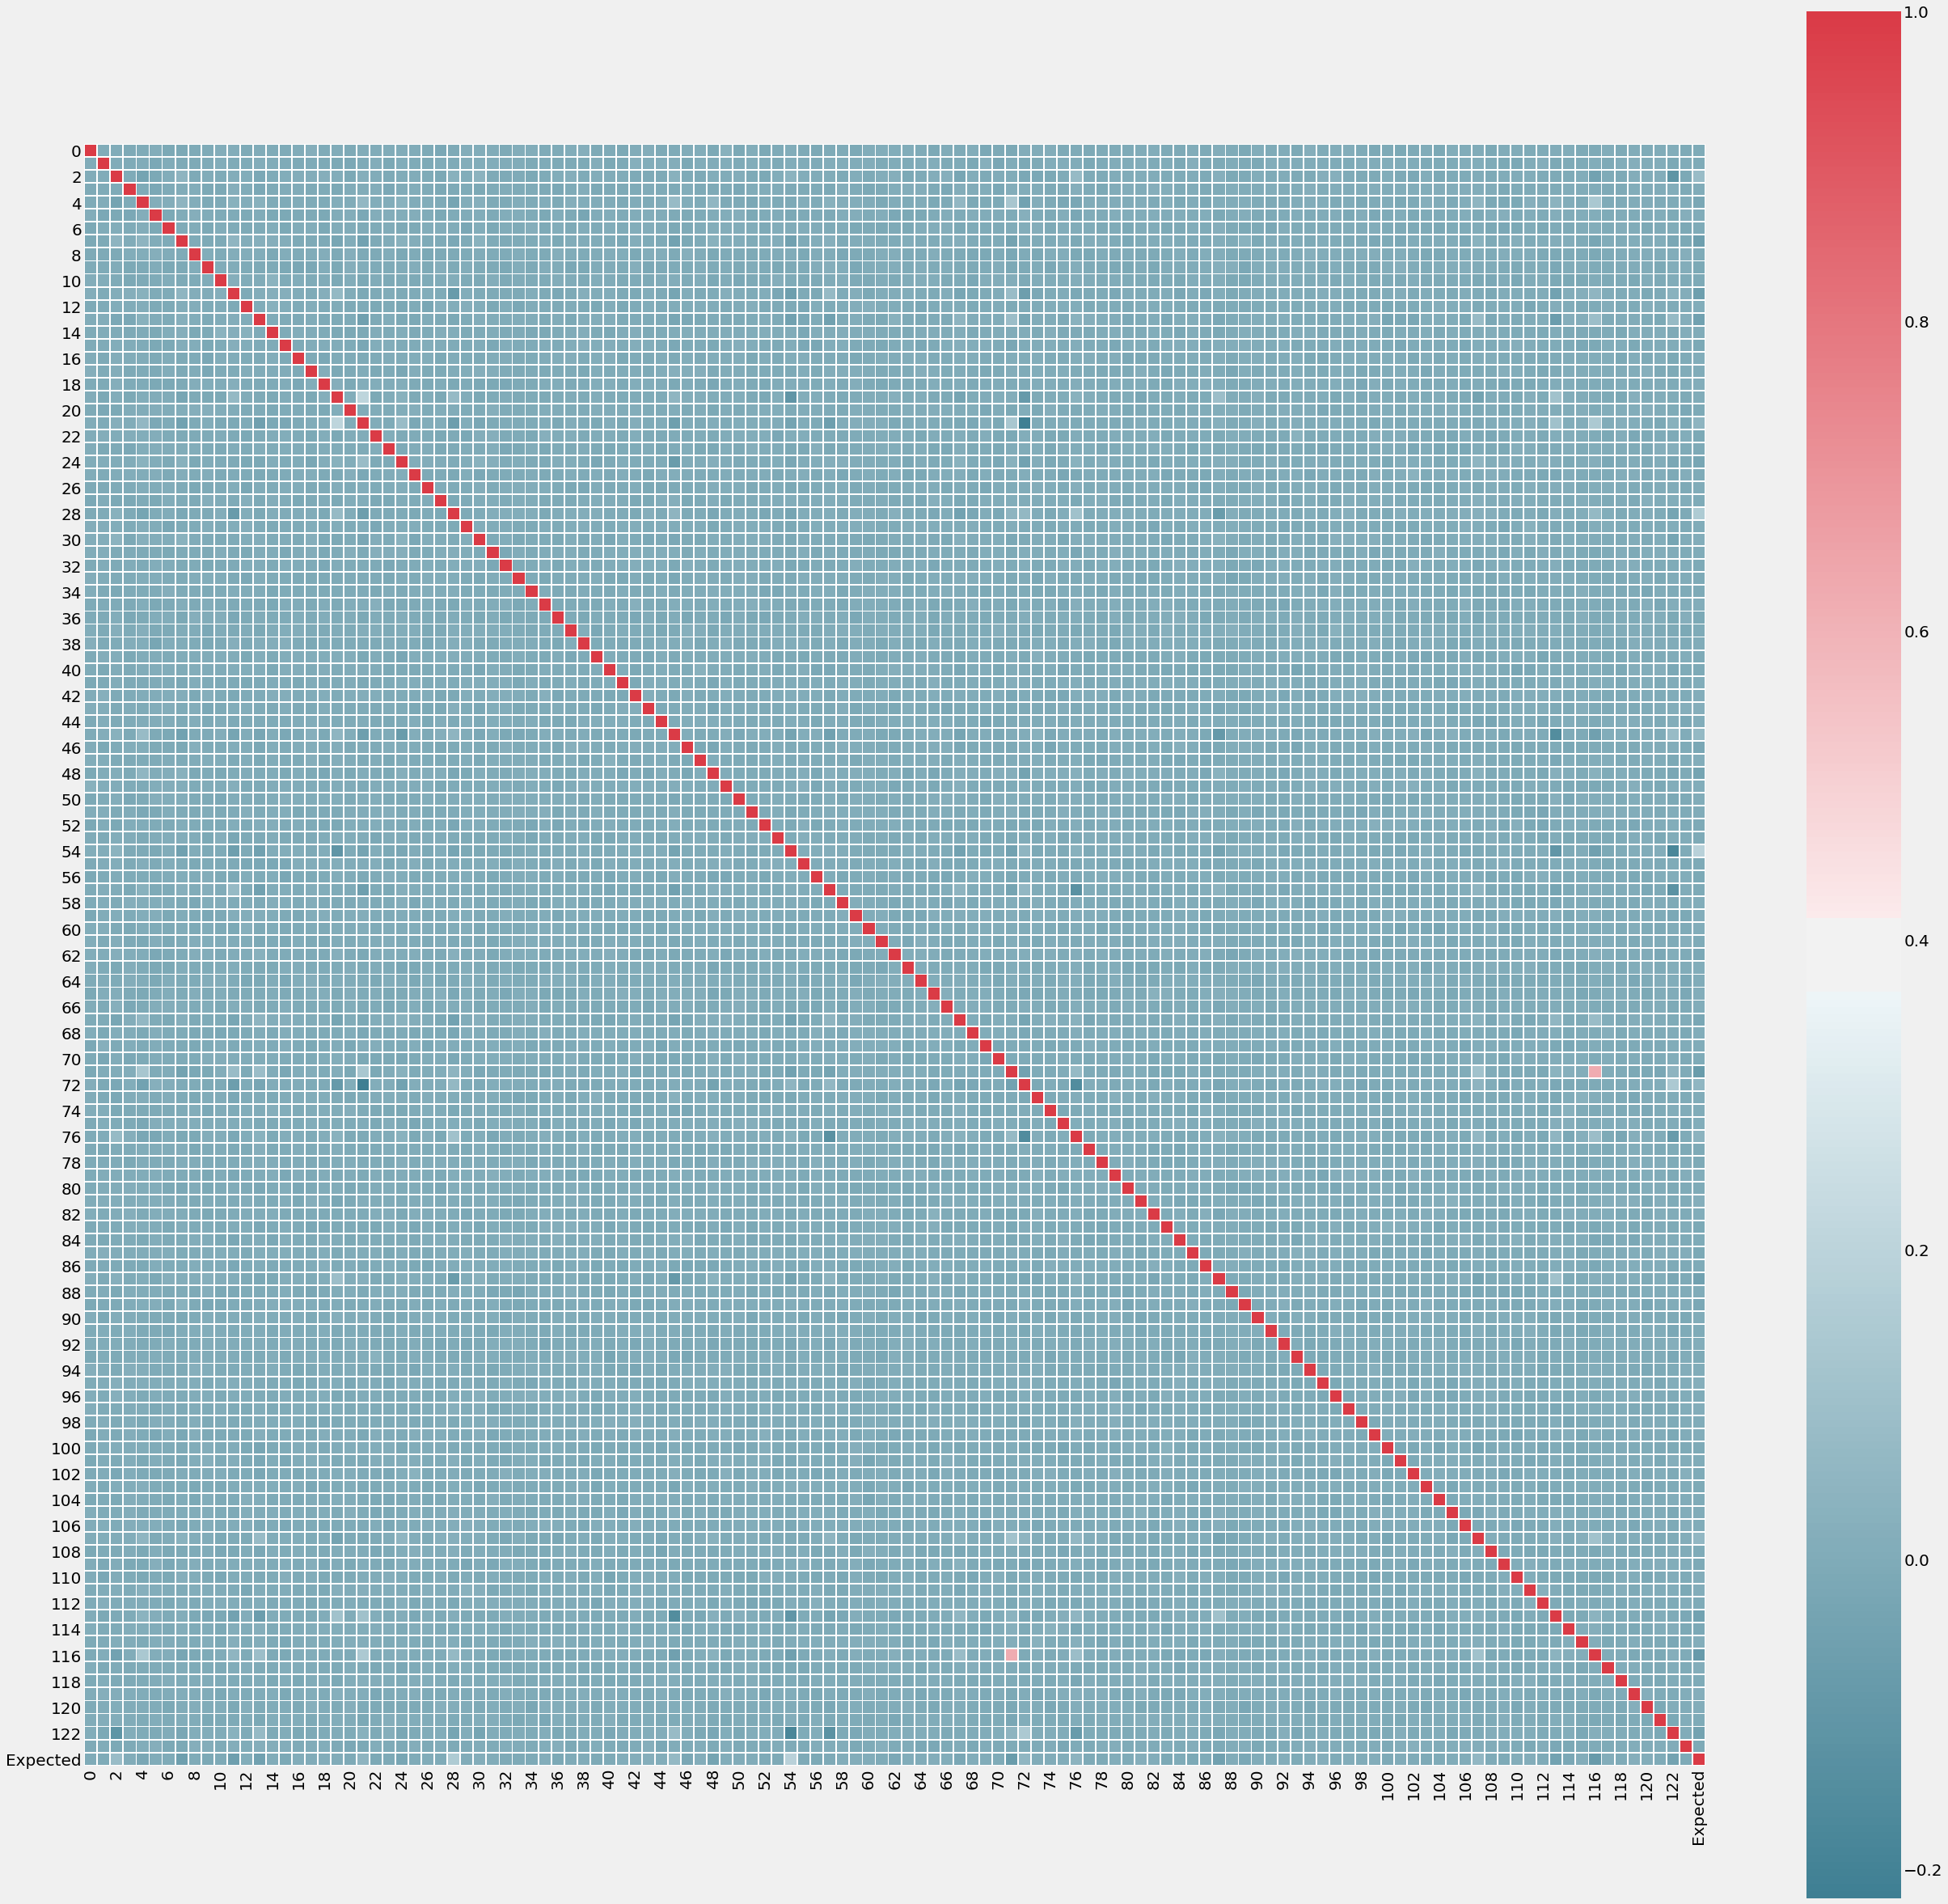

In [72]:
def correlation_heatmap(df):
    corr = df.corr()
    _, ax = plt.subplots(figsize=(40, 40))
    sns.heatmap(corr, annot=False, fmt='.1f', linewidths=.9, cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax)
    plt.show()

data_train_ = data_train.drop(columns=['Id'])
correlation_heatmap(data_train_)

In [64]:
corr_matrix = data_train.corr()
corr_matrix['Expected'].sort_values(ascending=False)

Expected    1.000000
54          0.186376
28          0.155509
2           0.084917
45          0.068204
              ...   
13         -0.051993
7          -0.057146
11         -0.060402
71         -0.072223
116        -0.085292
Name: Expected, Length: 126, dtype: float64

# Train-test split

In [20]:
# prepare data set
drop_cols = ['Id']
data_feat_sel = data_train.drop(columns=drop_cols)

X = data_feat_sel.drop(columns=['Expected'])
y = data_feat_sel['Expected']

# validation train split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42) # set the seed for reproducibility

# Weights

In [21]:
from sklearn.utils import class_weight

class_weight = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weight

array([3.1152648 , 0.56369786, 1.10497238])

In [22]:
np.unique(y_train)

array([0, 1, 2])

In [23]:
w_array = np.ones(y_train.shape[0], dtype = 'float')
for i, val in enumerate(y_train):
    w_array[i] = class_weight[val-1]

# Pipeline for Random search of the best model

In [24]:
# pipeline
select_K_filter = SelectKBest(f_classif)
clf = RandomForestClassifier()

pipe = Pipeline([('select_K_features', select_K_filter), ('clf', clf)])

In [94]:
K_FEATURES = list(range(1, 124, 1)) #uniform(loc=3, scale=20) #list(range(3, 23))
N_ESTIMATORS = list(range(10, 300, 10))#uniform(loc=10, scale=90) #list(range(10, 300, 1))
LEARNING_RATE =  np.arange(0.1, 2, 0.1).tolist() #uniform(loc=0.001, scale=4.999)#np.arange(0.001, 5, 0.001).tolist()
MAX_DEPTH =  list(range(1, 22, 2))#uniform(loc=1, scale=19) #list(range(1, 20, 1))

params = [
    {
        'select_K_features__k': K_FEATURES
    },
    {
        'clf': [RandomForestClassifier(random_state=42, class_weight=class_weight)],
        'clf__max_depth' : MAX_DEPTH,
        'clf__n_estimators' : N_ESTIMATORS        
    },
    {
        'clf': [AdaBoostClassifier(random_state=42)],
        'clf__base_estimator' : [DecisionTreeClassifier(class_weight=class_weight)],
        'clf__base_estimator__max_depth' : MAX_DEPTH,
        'clf__n_estimators'  : N_ESTIMATORS,
        'clf__algorithm'     : 'SAMME.R',
        'clf__learning_rate' : LEARNING_RATE
    },
    {
        'clf': [CatBoostClassifier(random_seed= 42, class_weights=class_weight, logging_level='Silent')],
        'clf__n_estimators' : N_ESTIMATORS,
        'clf__depth' : MAX_DEPTH,
        'clf__learning_rate' : LEARNING_RATE
    }
#     },
#     {
#         'clf': [XGBClassifier(random_state=42, sample_weight=w_array)],
#         'clf__n_estimators'  : N_ESTIMATORS,
#         'clf__depth' : MAX_DEPTH,
#         'clf__learning_rate' : LEARNING_RATE
#     }    
]

# Create a random  search object
randsearch = RandomizedSearchCV(pipe, params, cv=10, scoring='f1_macro', n_iter=100, n_jobs=-1, verbose=1)

In [95]:
randsearch.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 41.1min finished
learning rate is greater than 1. You probably need to decrease learning rate.


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('select_K_features',
                                              SelectKBest(k=10,
                                                          score_func=<function f_classif at 0x1a276e6c20>)),
                                             ('clf',
                                              RandomForestClassifier(bootstrap=True,
                                                                     ccp_alpha=0.0,
                                                                     class_weight=None,
                                                                     criterion='gini',
                                                                     max_depth=None,
                                                                     max_features='auto',
                                                                     max_leaf_nodes=None,
    

# Best estimator

In [97]:
randsearch.best_estimator_

Pipeline(memory=None,
         steps=[('select_K_features',
                 SelectKBest(k=10,
                             score_func=<function f_classif at 0x1a276e6c20>)),
                ('clf',
                 <catboost.core.CatBoostClassifier object at 0x1b003c8550>)],
         verbose=False)

In [98]:
randsearch.best_params_

{'clf__n_estimators': 290,
 'clf__learning_rate': 1.6,
 'clf__depth': 13,
 'clf': <catboost.core.CatBoostClassifier at 0x1b05fe8d10>}

# Feature importance, score, confusion matrix

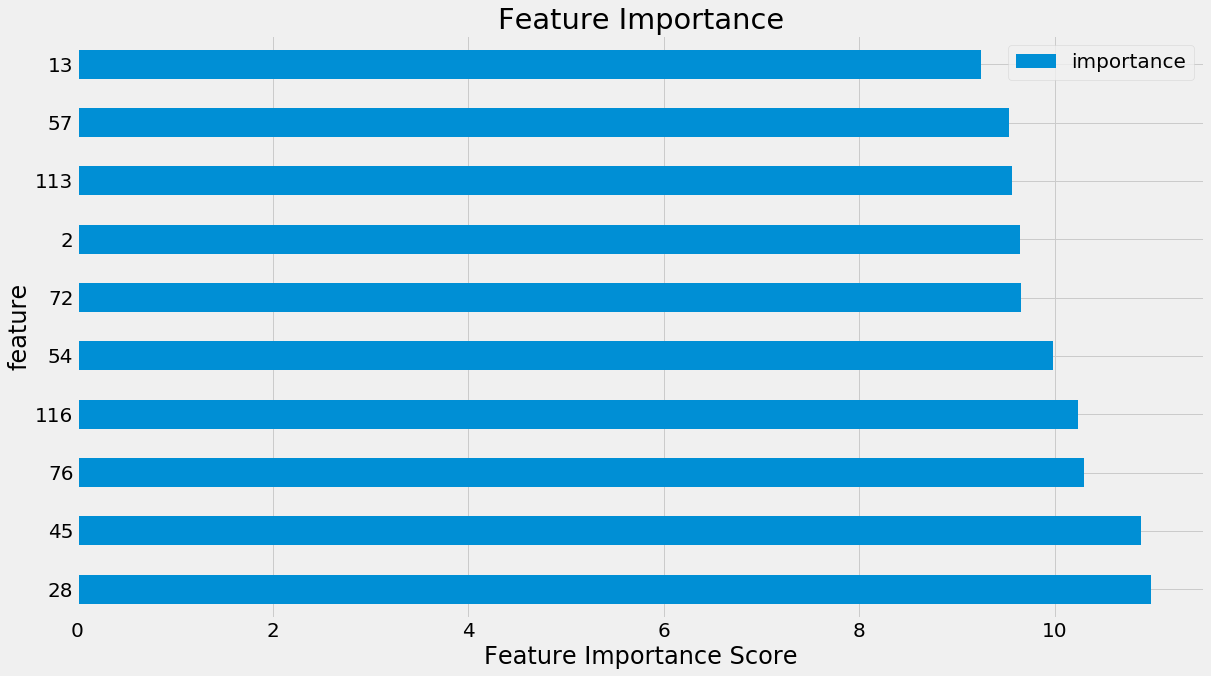

In [99]:
b_clf = randsearch.best_estimator_.named_steps['clf']
features_sel = X_train.columns[randsearch.best_estimator_.named_steps['select_K_features'].get_support()]
functions.plot_feature_importance2(b_clf, features_sel)

In [100]:
sel = randsearch.best_estimator_.named_steps['select_K_features'].get_support()
col_sel = X_validation.columns[sel]
X_validation_sel = X_validation[col_sel]
X_validation_sel.columns
y_pred = randsearch.best_estimator_.named_steps['clf'].predict(X_validation_sel.values)
print(classification_report(y_validation,y_pred))

              precision    recall  f1-score   support

           0       0.25      0.15      0.19       285
           1       0.77      0.83      0.80      1834
           2       0.59      0.56      0.58       881

    accuracy                           0.69      3000
   macro avg       0.54      0.52      0.52      3000
weighted avg       0.67      0.69      0.67      3000



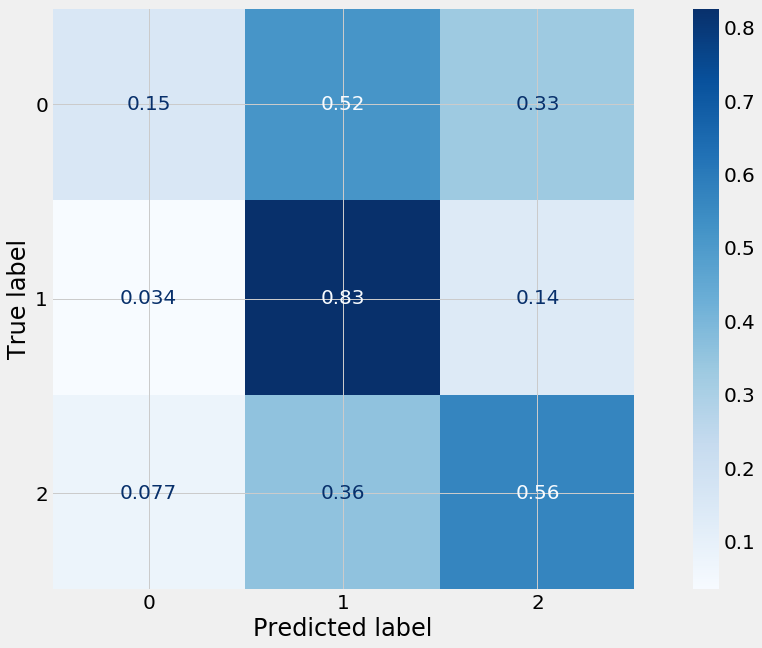

In [102]:
functions.plot_conf_matrix(b_clf, X_validation_sel.values, y_validation)

In [65]:
cols=['13','57','113','2','72','54','116','76','45','28']
X_train_rgs = X_train[cols]
y_train_rgs = y_train.copy()

best_clf = CatBoostClassifier(n_estimators=290, depth=13, learning_rate=1.6, random_seed= 42, class_weights=class_weight, logging_level='Silent')
best_clf.fit(X_train_rgs, y_train_rgs)

learning rate is greater than 1. You probably need to decrease learning rate.


In [66]:
X_validation_rgs = X_validation[cols]
y_pred_rgs = best_clf.predict(X_validation_rgs) 
print(classification_report(y_validation,y_pred_rgs))

              precision    recall  f1-score   support

           0       0.24      0.15      0.18       285
           1       0.77      0.82      0.79      1834
           2       0.59      0.58      0.59       881

    accuracy                           0.69      3000
   macro avg       0.53      0.52      0.52      3000
weighted avg       0.67      0.69      0.68      3000



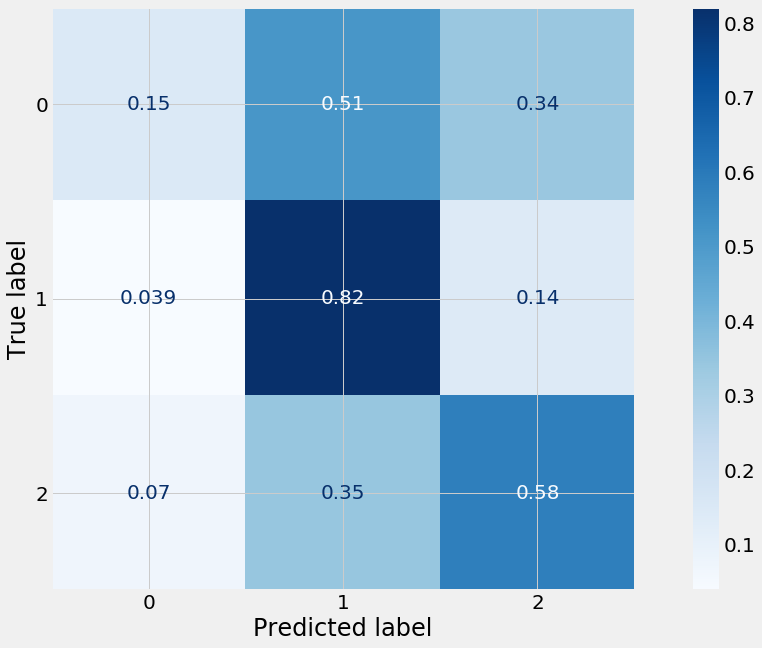

In [67]:
functions.plot_conf_matrix(best_clf, X_validation_rgs.values, y_validation)

# Undersampling and Oversampling

Number of class_0 :  1284
Number of class_1 :  7096
Number of class_2 :  3620


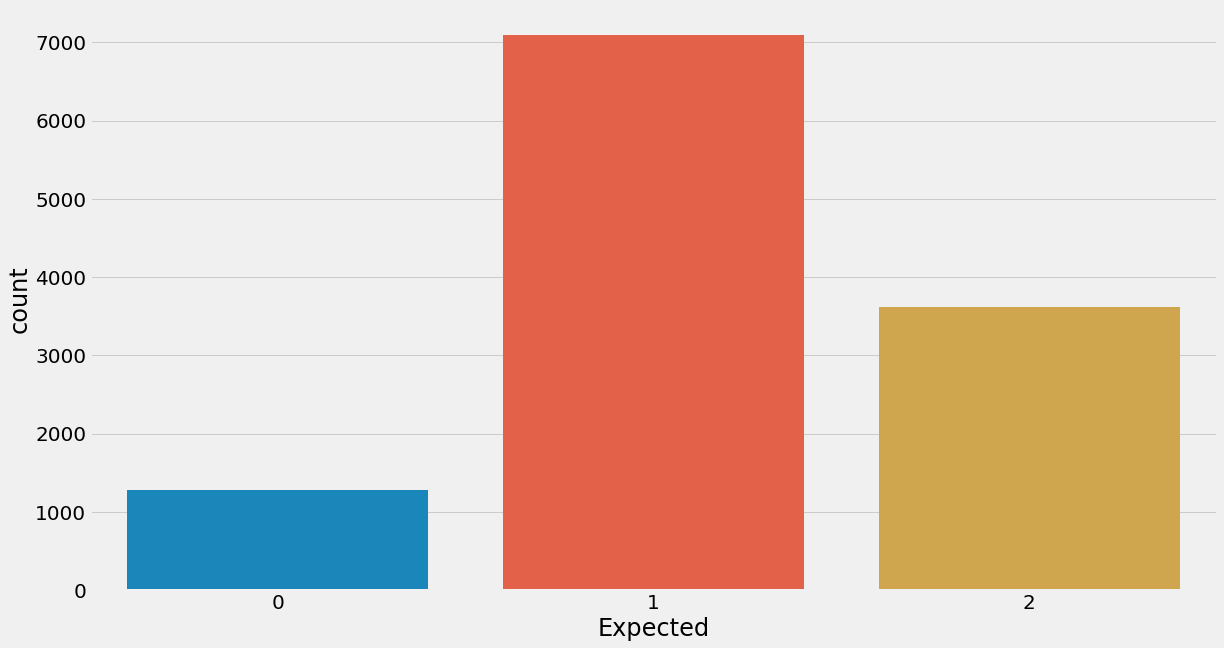

In [25]:
data_train = X_train.copy()
data_train['Expected'] = y_train

sns.countplot(data_train['Expected'],label="Count")
class_1, class_2, class_0 = y_train.value_counts()
print('Number of class_0 : ',class_0)
print('Number of class_1 : ',class_1)
print('Number of class_2 : ',class_2)

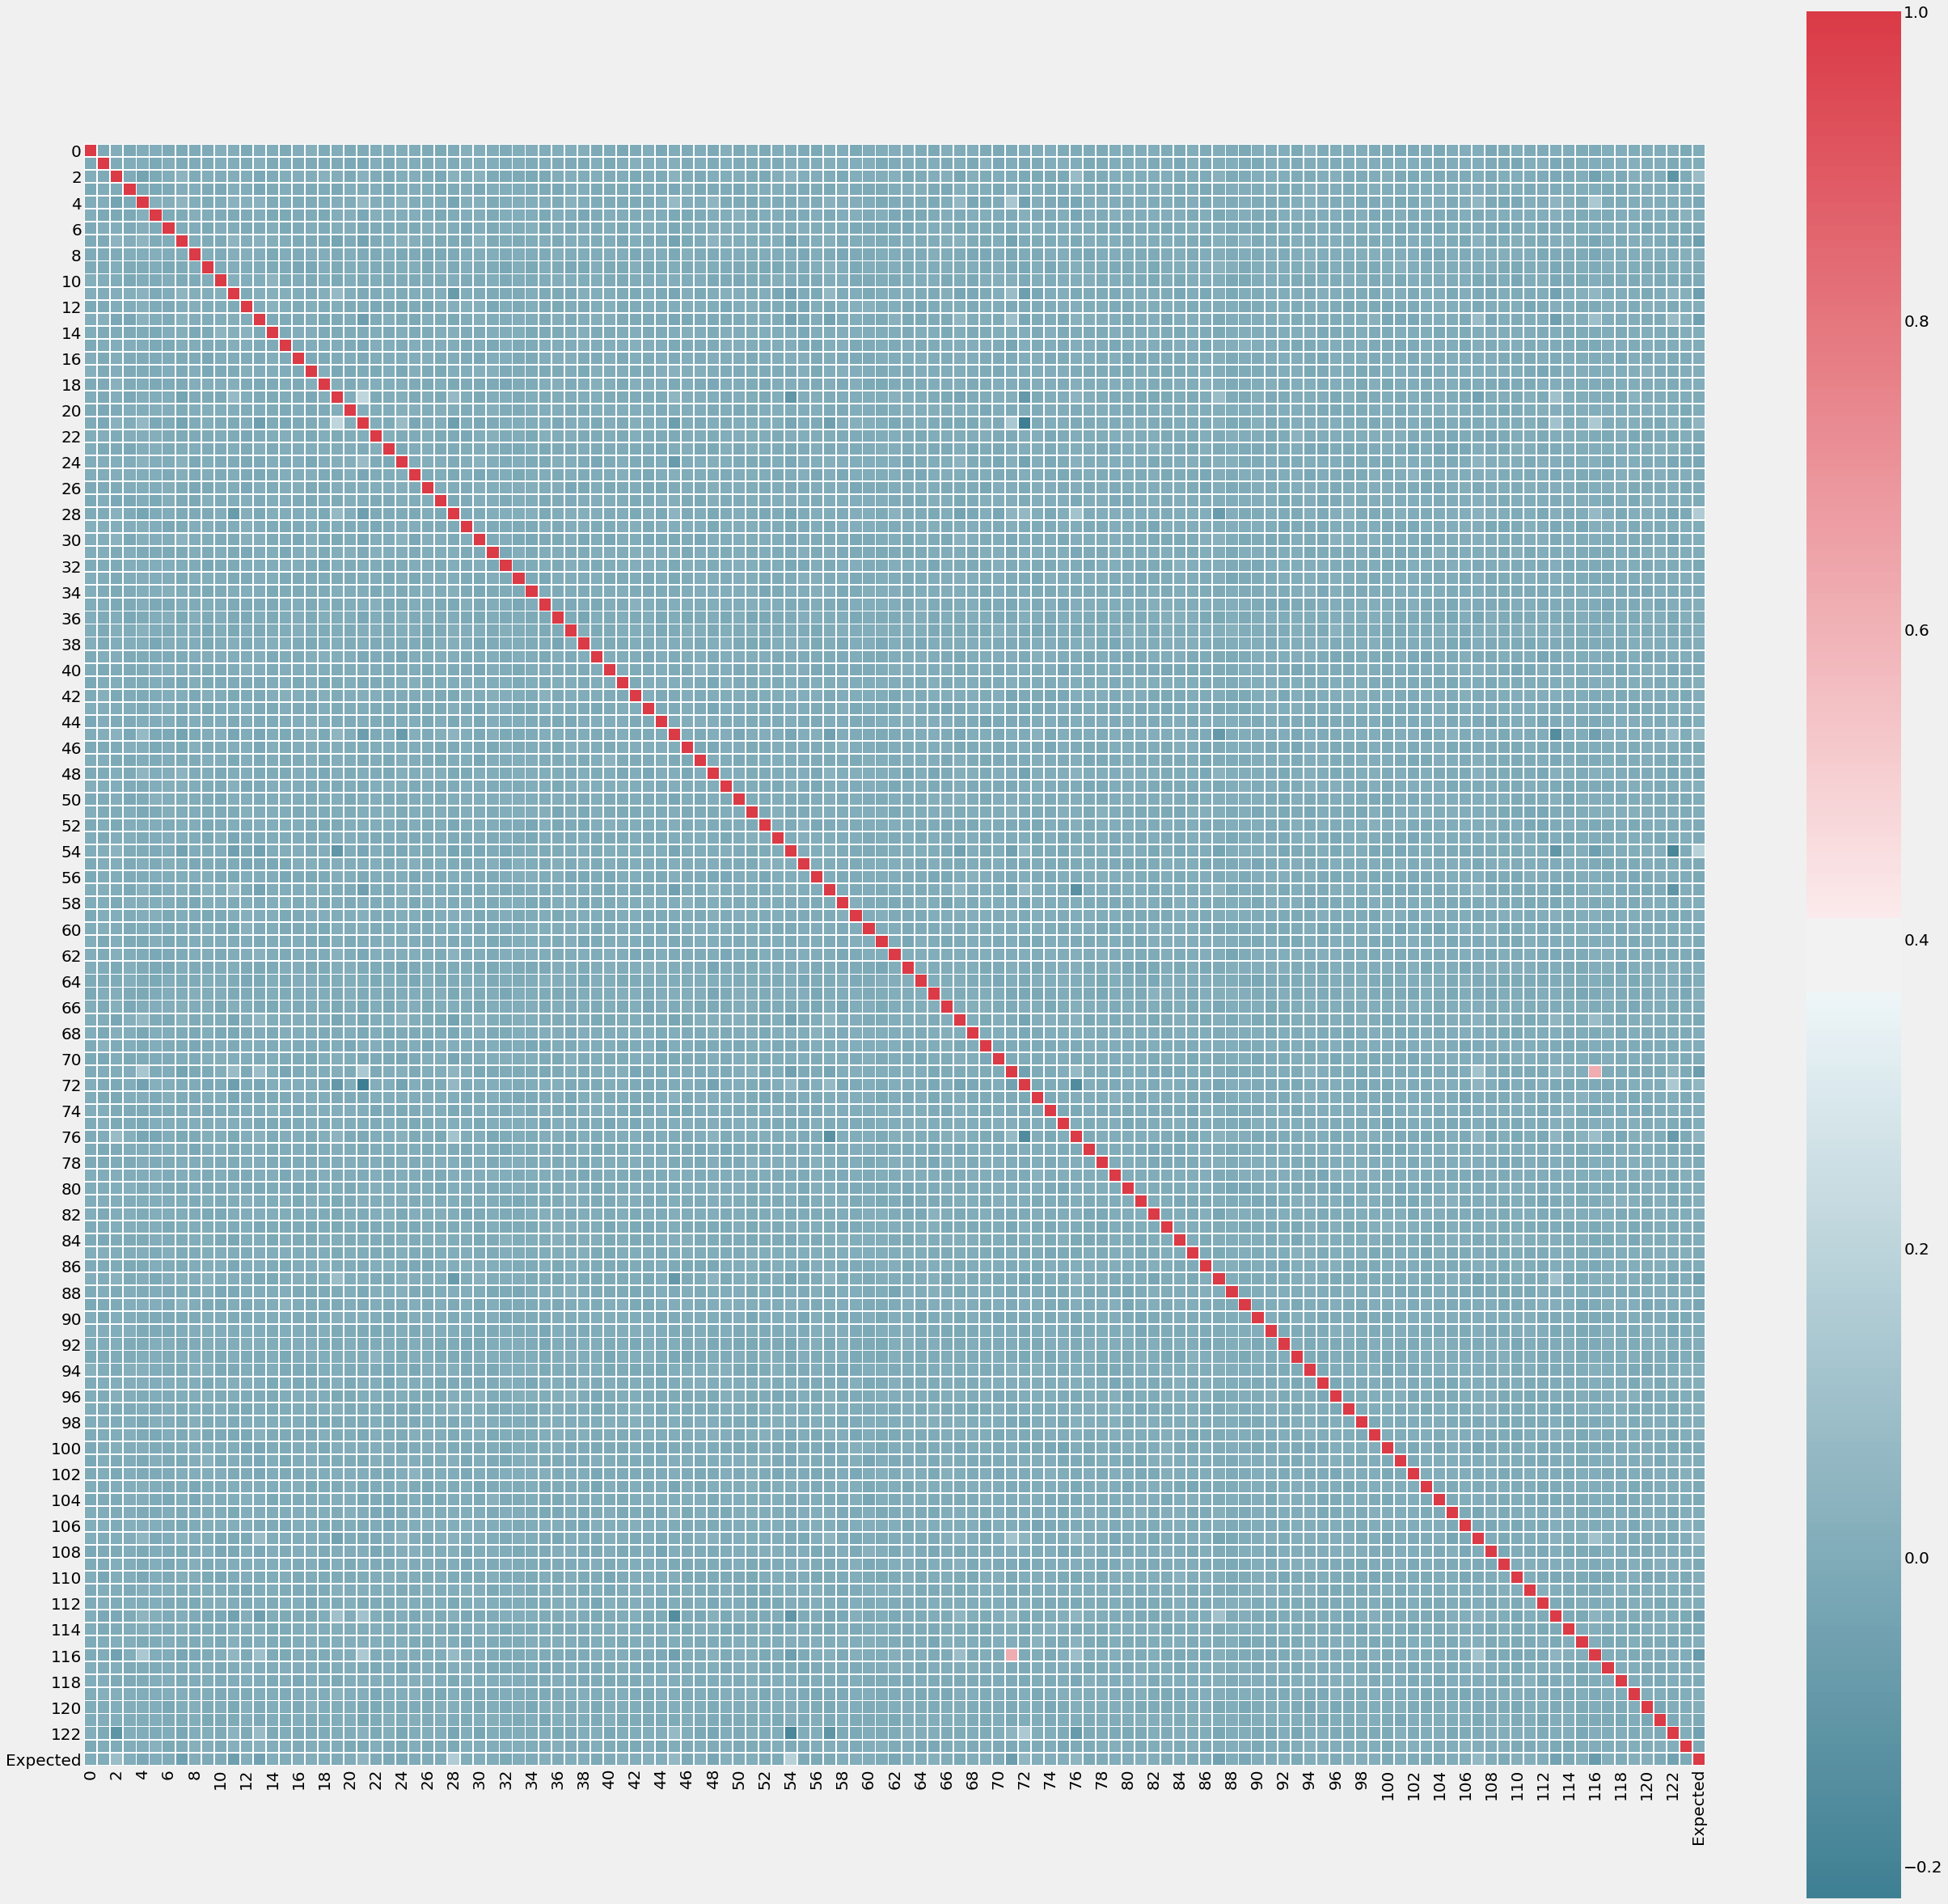

In [109]:
correlation_heatmap(data_train)

In [26]:
# try oversampling with SMOTE
from imblearn.over_sampling import SMOTE

print(X_train.shape, y_train.shape)
smote = SMOTE('auto', random_state=42)
X_sm, y_sm = smote.fit_sample(X_train, y_train)
print(X_sm.shape, y_sm.shape)

(12000, 124) (12000,)
(21288, 124) (21288,)


Number of class_0 :  7096
Number of class_1 :  7096
Number of class_2 :  7096


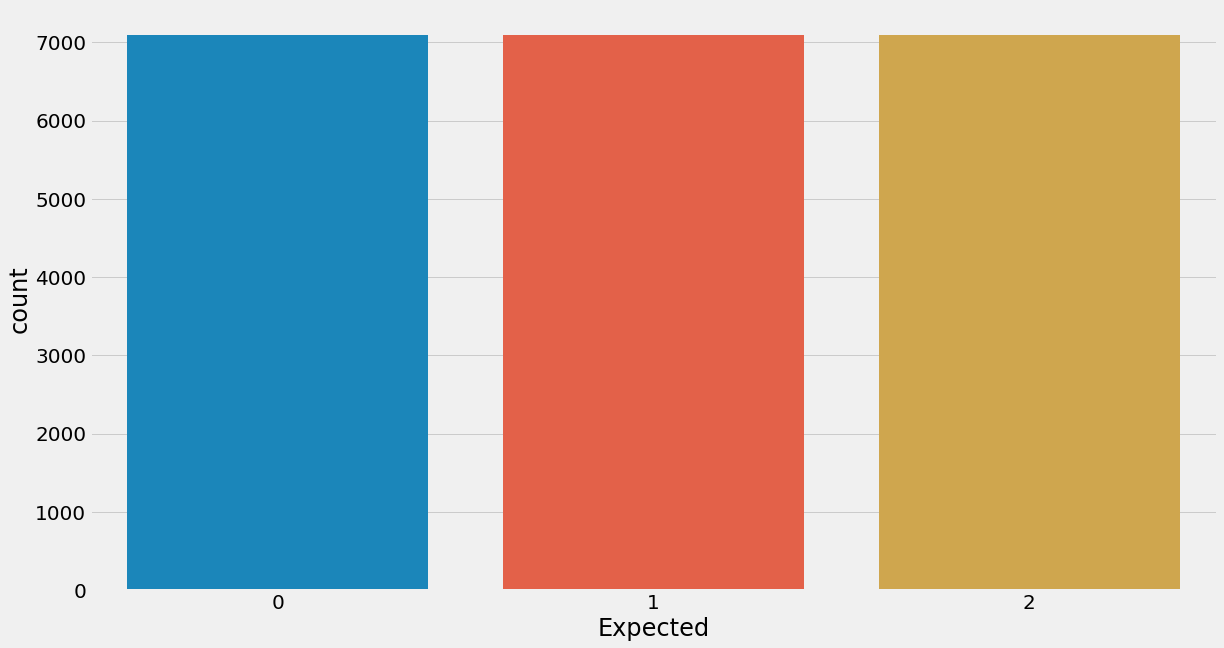

In [27]:
data_train_sm = X_sm.copy()
data_train_sm['Expected'] = y_sm

sns.countplot(data_train_sm['Expected'],label="Count")
class_0, class_1, class_2 = y_sm.value_counts()
print('Number of class_0 : ',class_0)
print('Number of class_1 : ',class_1)
print('Number of class_2 : ',class_2)

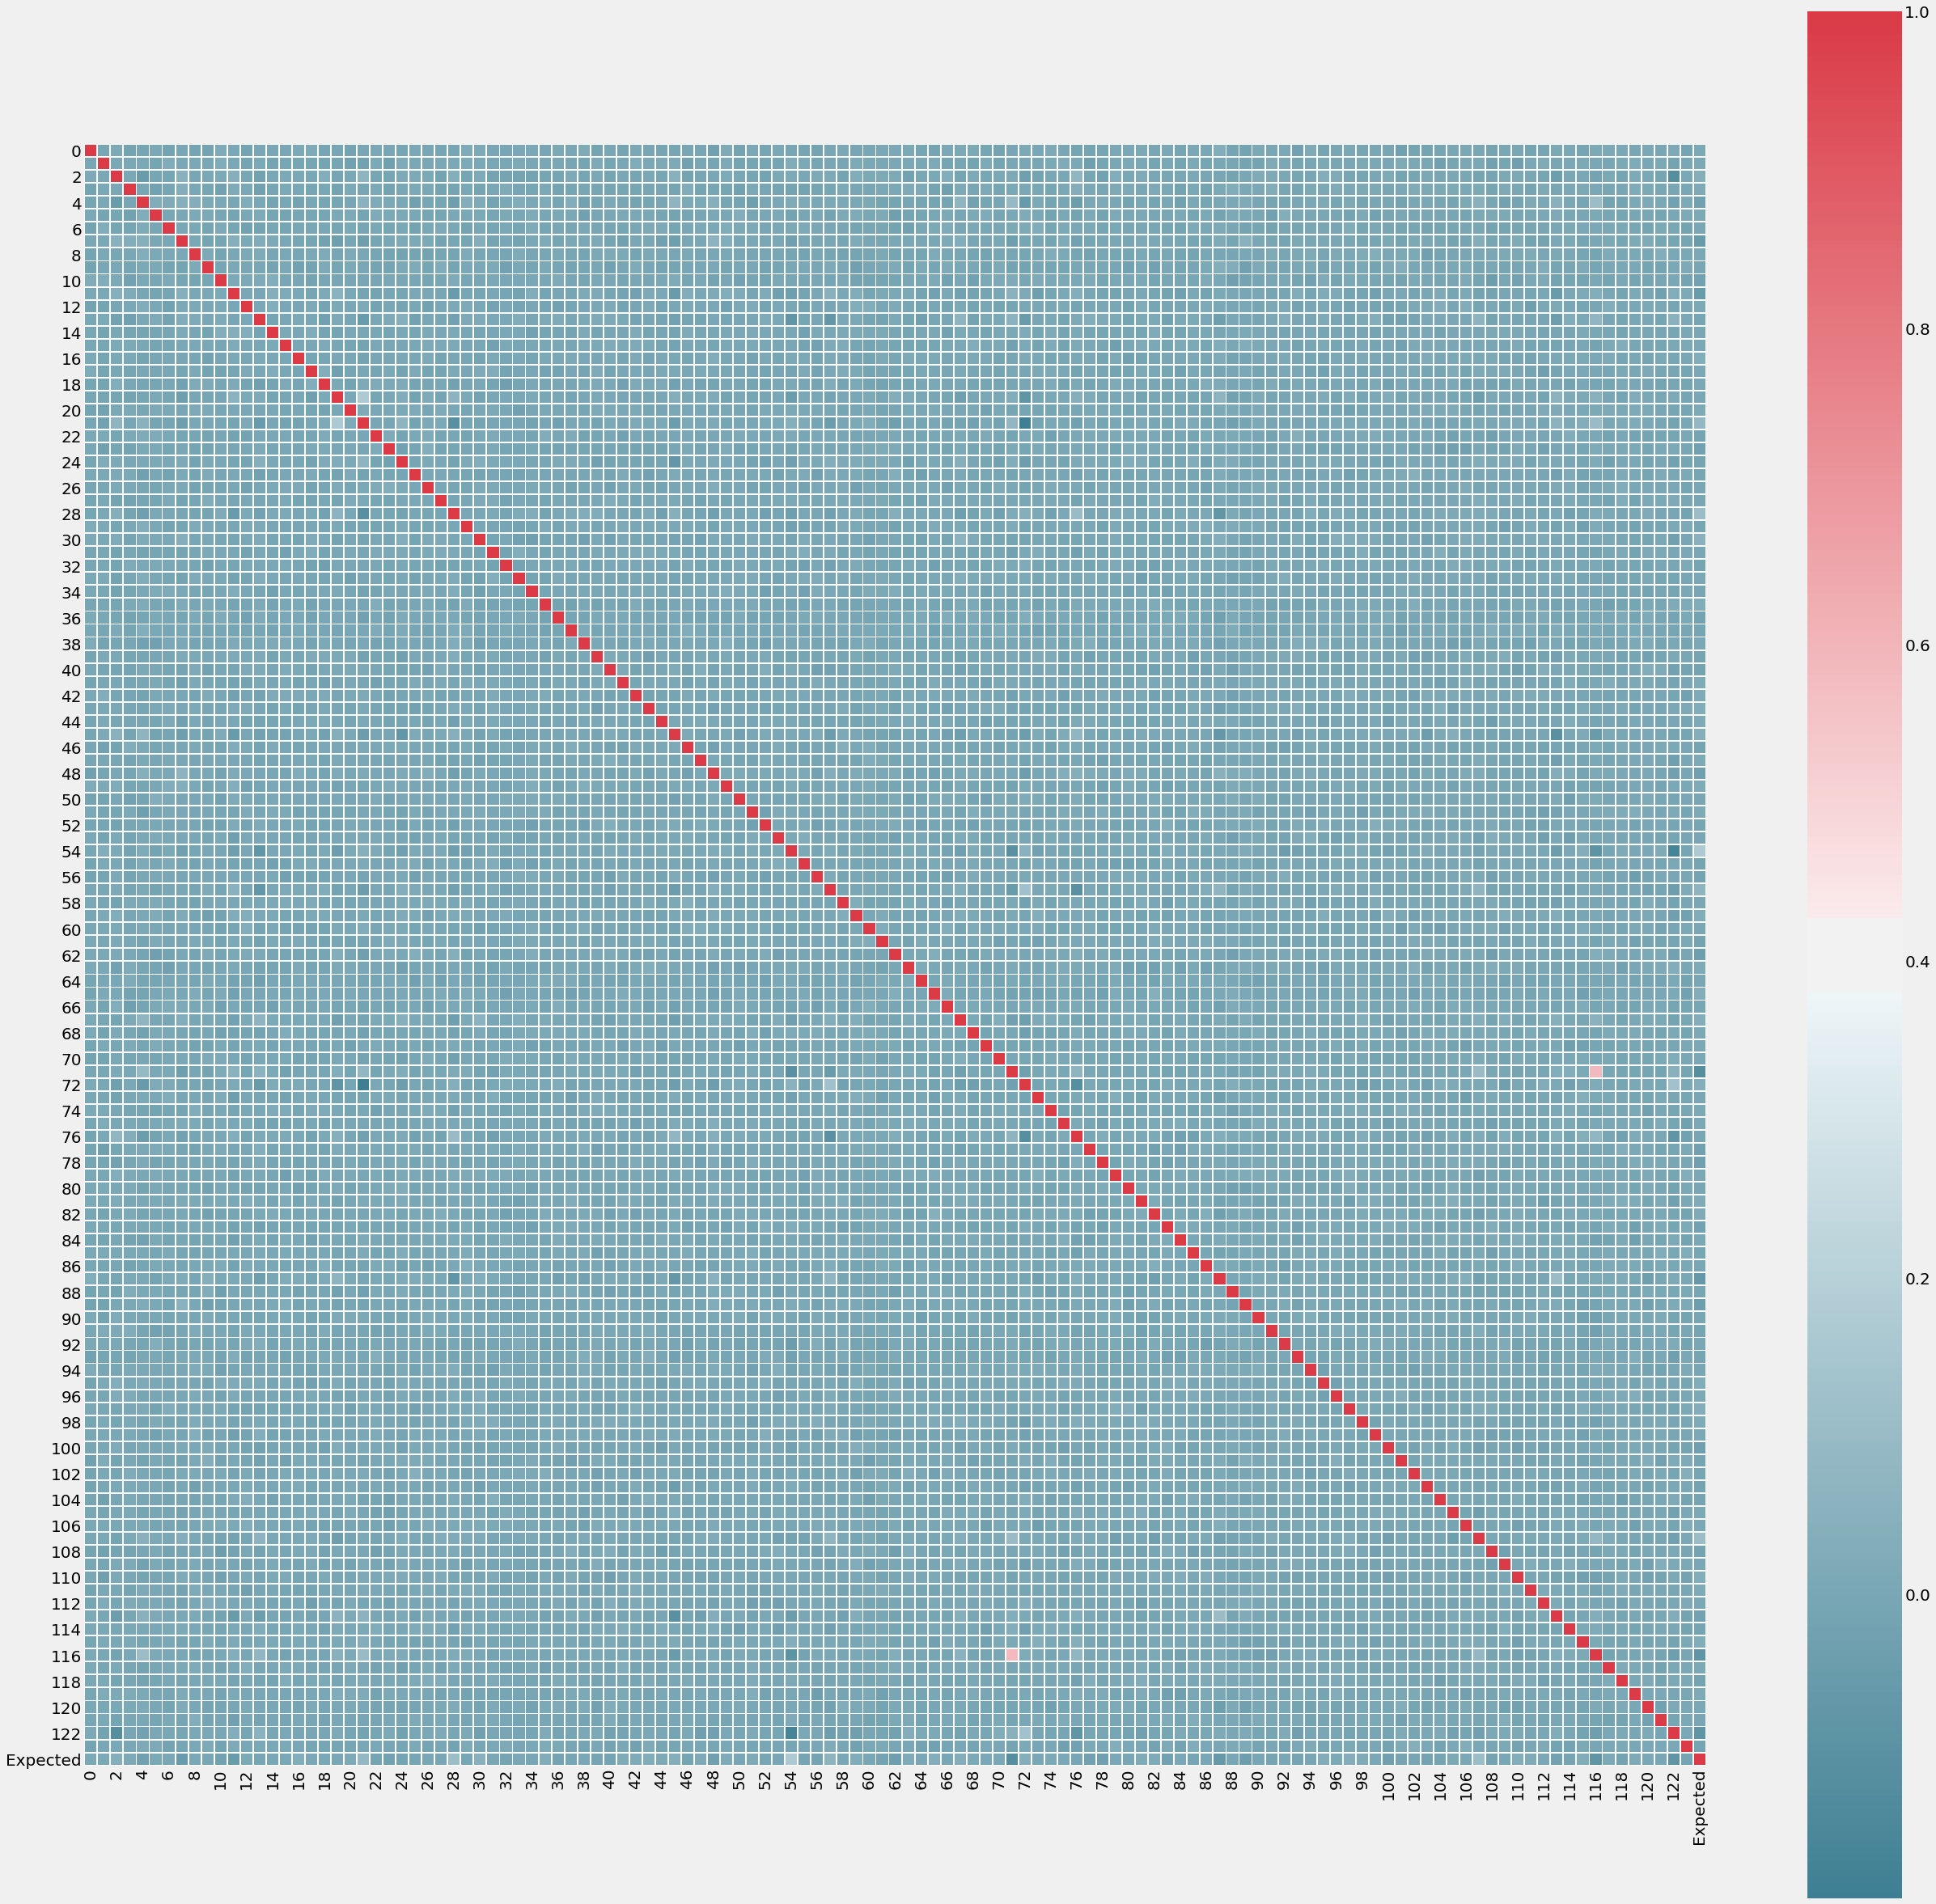

In [29]:
def correlation_heatmap(df):
    corr = df.corr()
    _, ax = plt.subplots(figsize=(40, 40))
    sns.heatmap(corr, annot=False, fmt='.1f', linewidths=.9, cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax, vmin=corr.min(), vmax=corr.max())
    plt.show()
correlation_heatmap(data_train_sm)

In [68]:
cols=['13','57','113','2','72','54','116','76','45','28']
X_train_rgs_o = X_sm[cols]
y_train_rgs_o = y_sm.copy()

fit_o = best_clf.fit(X_train_rgs_o, y_train_rgs_o)

learning rate is greater than 1. You probably need to decrease learning rate.


              precision    recall  f1-score   support

           0       0.21      0.42      0.28       285
           1       0.82      0.68      0.74      1834
           2       0.55      0.56      0.56       881

    accuracy                           0.62      3000
   macro avg       0.52      0.55      0.52      3000
weighted avg       0.68      0.62      0.64      3000



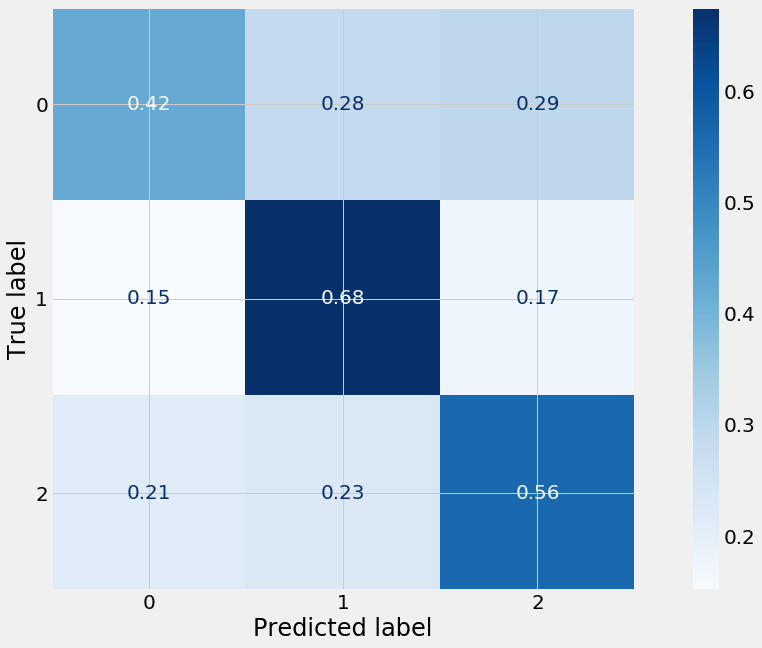

In [69]:
y_pred_rgs_o = fit_o.predict(X_validation_rgs) 
print(classification_report(y_validation,y_pred_rgs_o))

functions.plot_conf_matrix(fit_o, X_validation_rgs.values, y_validation)

In [59]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler


print(X_train.shape, y_train.shape)
under = RandomUnderSampler(sampling_strategy='auto')
X_u, y_u = under.fit_resample(X_train, y_train)

print(X_u.shape, y_u.shape)

(12000, 124) (12000,)
(3852, 124) (3852,)


Number of class_0 :  1284
Number of class_1 :  1284
Number of class_2 :  1284


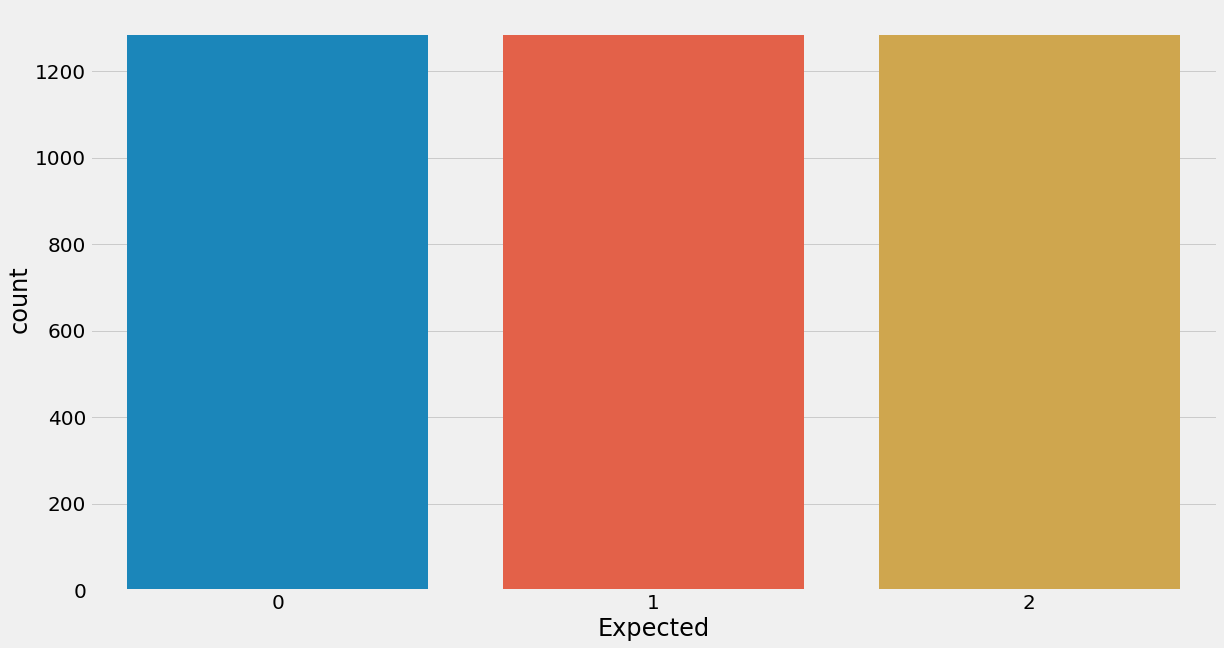

In [60]:
data_train_u = X_u.copy()
data_train_u['Expected'] = y_u

sns.countplot(data_train_u['Expected'],label="Count")
class_0, class_1, class_2 = y_u.value_counts()
print('Number of class_0 : ',class_0)
print('Number of class_1 : ',class_1)
print('Number of class_2 : ',class_2)

In [70]:
cols=['13','57','113','2','72','54','116','76','45','28']
X_train_rgs_u = X_u[cols]
y_train_rgs_u = y_u.copy()

fit_u = best_clf.fit(X_train_rgs_u, y_train_rgs_u)

learning rate is greater than 1. You probably need to decrease learning rate.


              precision    recall  f1-score   support

           0       0.17      0.60      0.26       285
           1       0.81      0.51      0.63      1834
           2       0.53      0.50      0.51       881

    accuracy                           0.52      3000
   macro avg       0.50      0.54      0.47      3000
weighted avg       0.67      0.52      0.56      3000



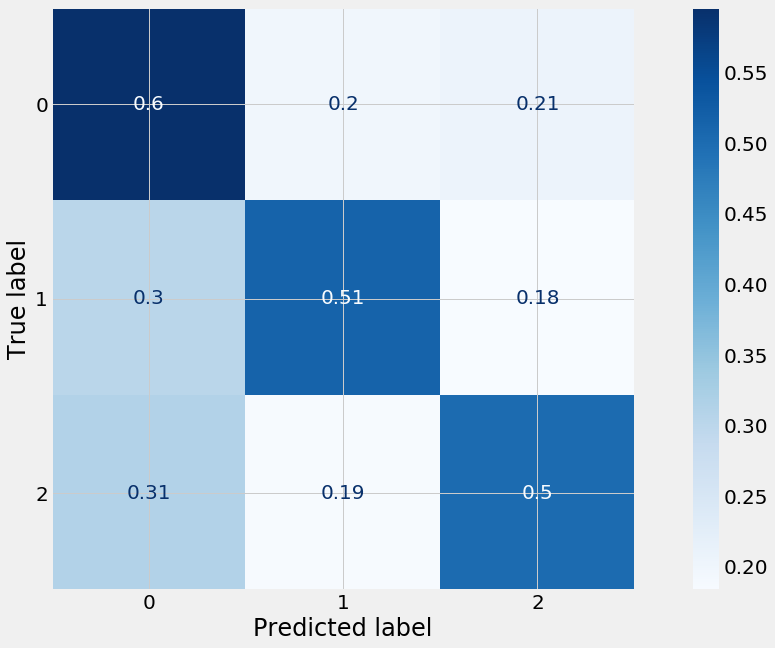

In [71]:
y_pred_rgs_u = fit_u.predict(X_validation_rgs) 
print(classification_report(y_validation,y_pred_rgs_u))

functions.plot_conf_matrix(fit_u, X_validation_rgs.values, y_validation)

-0.1767481685558837 1.0


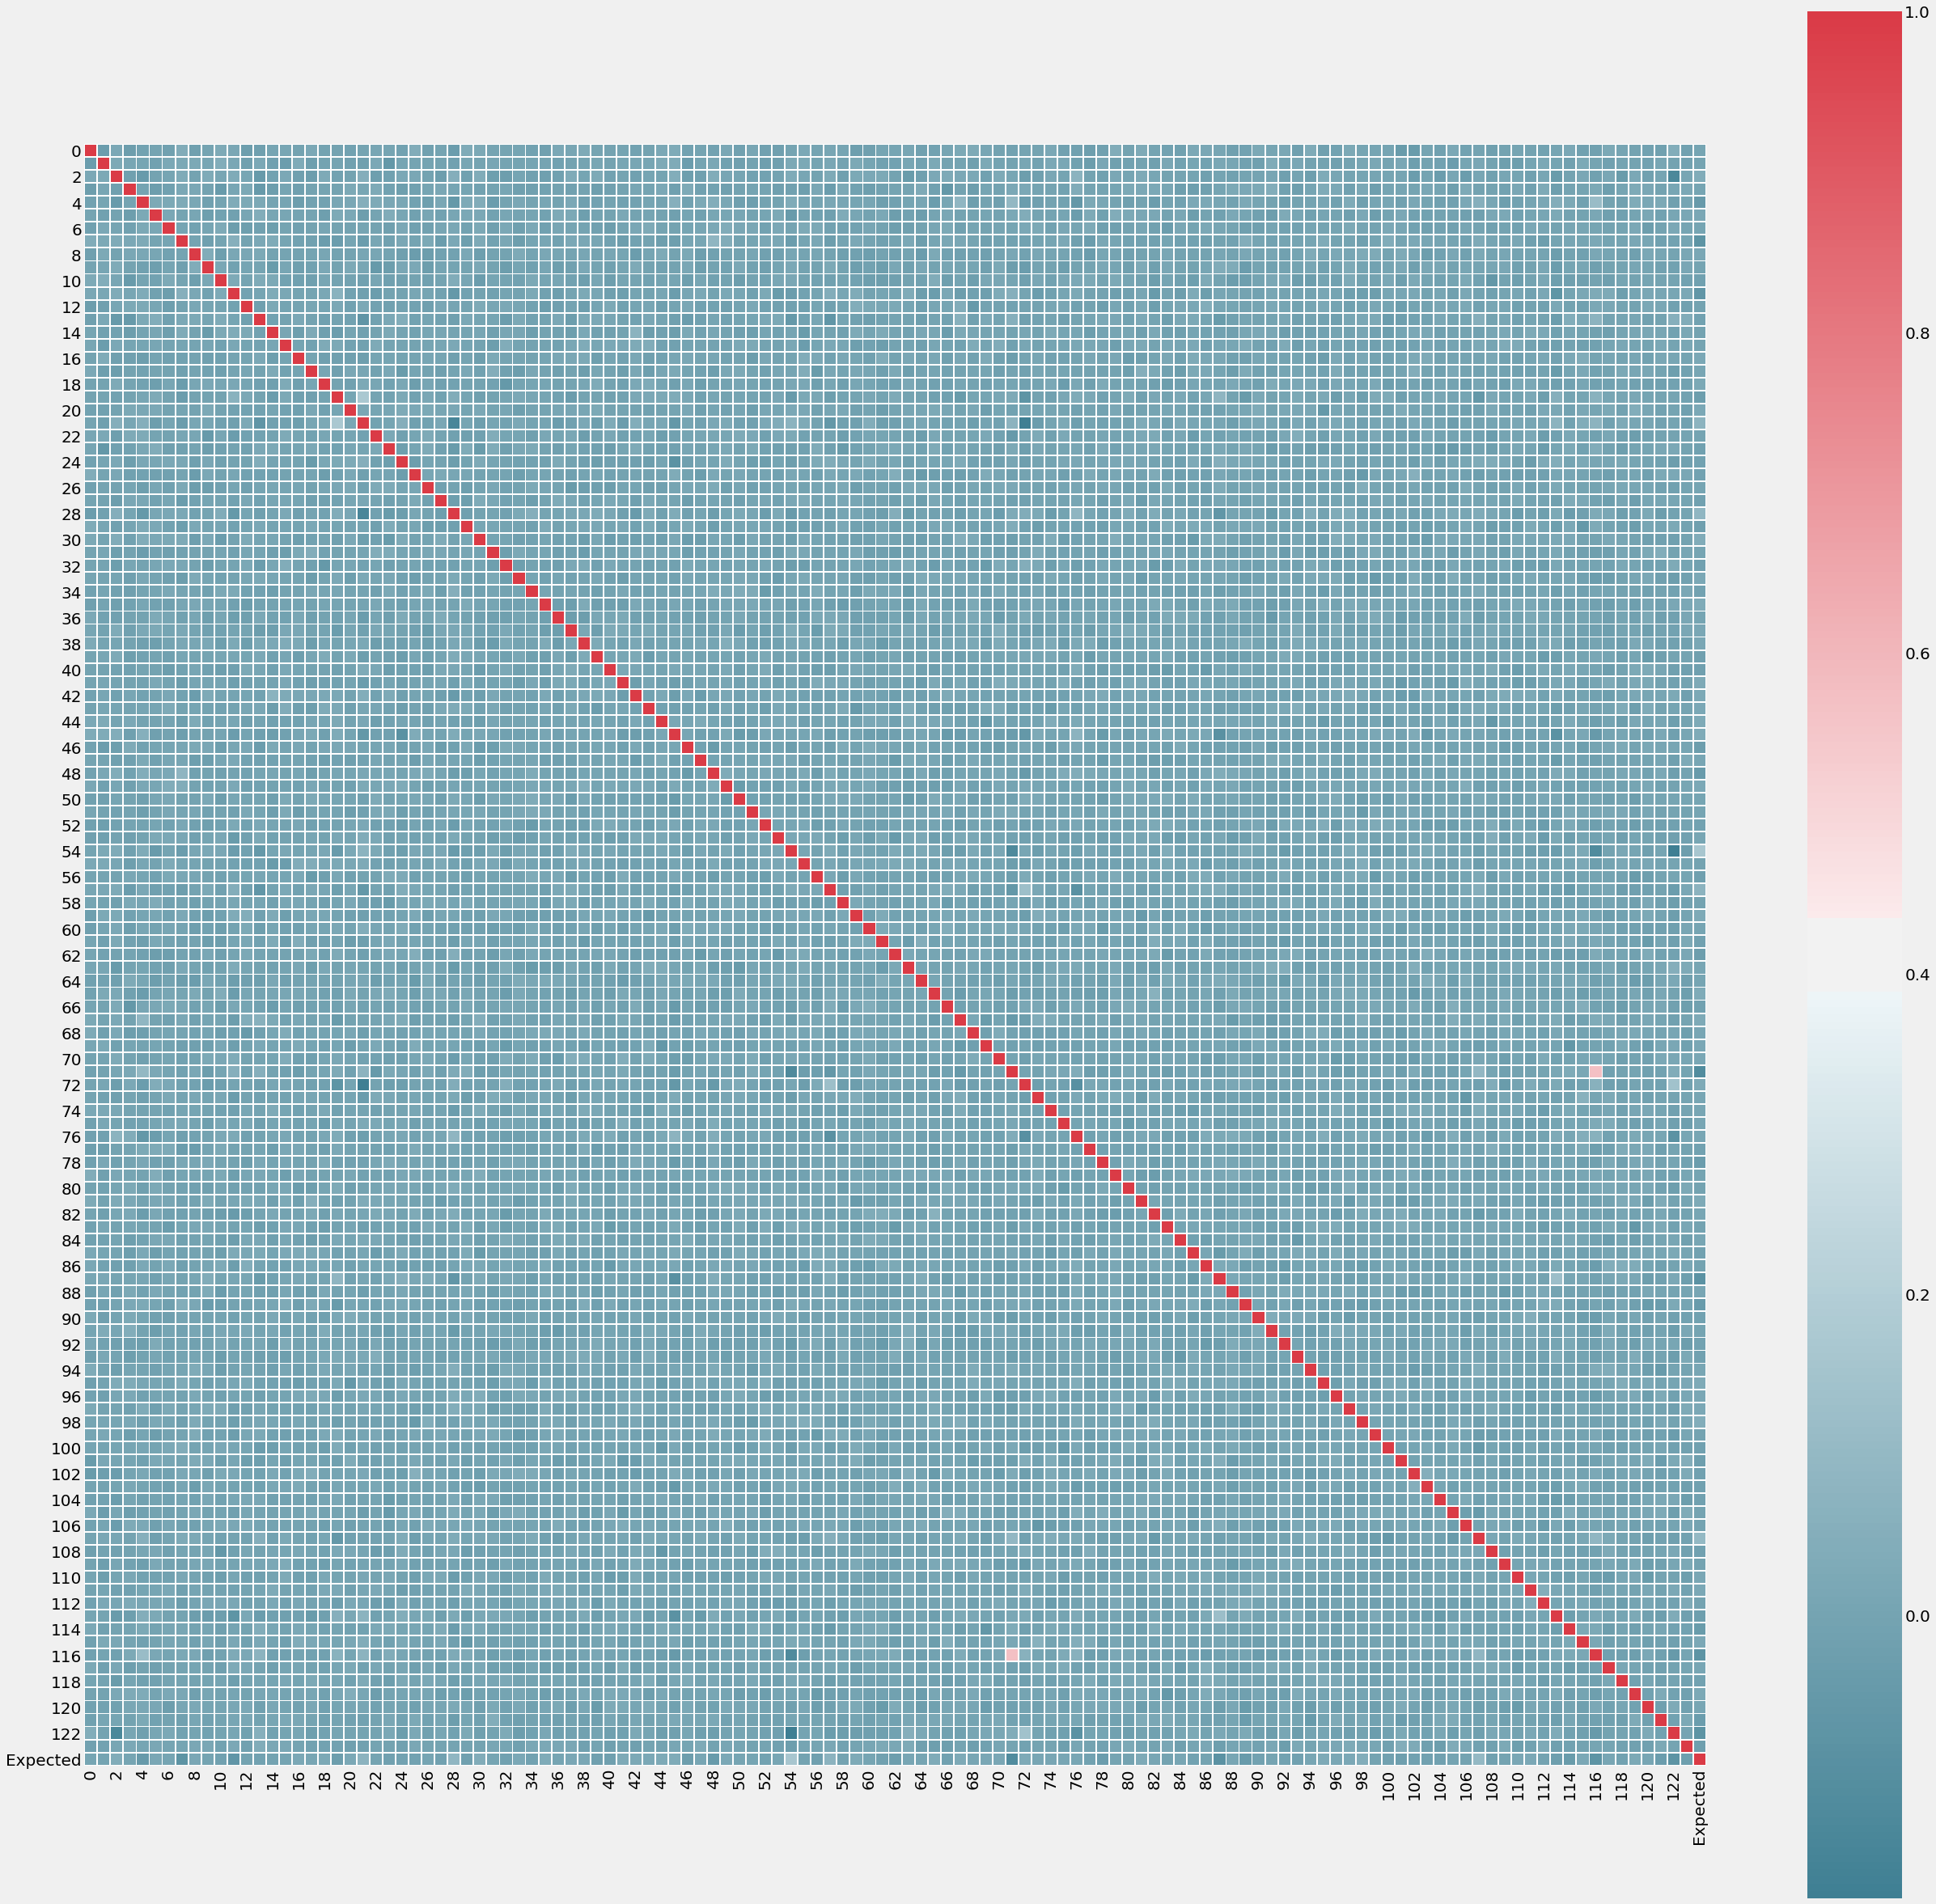

In [96]:
def correlation_heatmap(df):
    corr = df.corr()
    min=corr.min().min()
    max=1.
    print(min, max)
    _, ax = plt.subplots(figsize=(40, 40))
    sns.heatmap(corr, annot=False, fmt='.1f', linewidths=.9, cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax, vmin=min, vmax=max)
    plt.show()
correlation_heatmap(data_train_u)

Number of class_0 :  3620
Number of class_1 :  3620
Number of class_2 :  3620


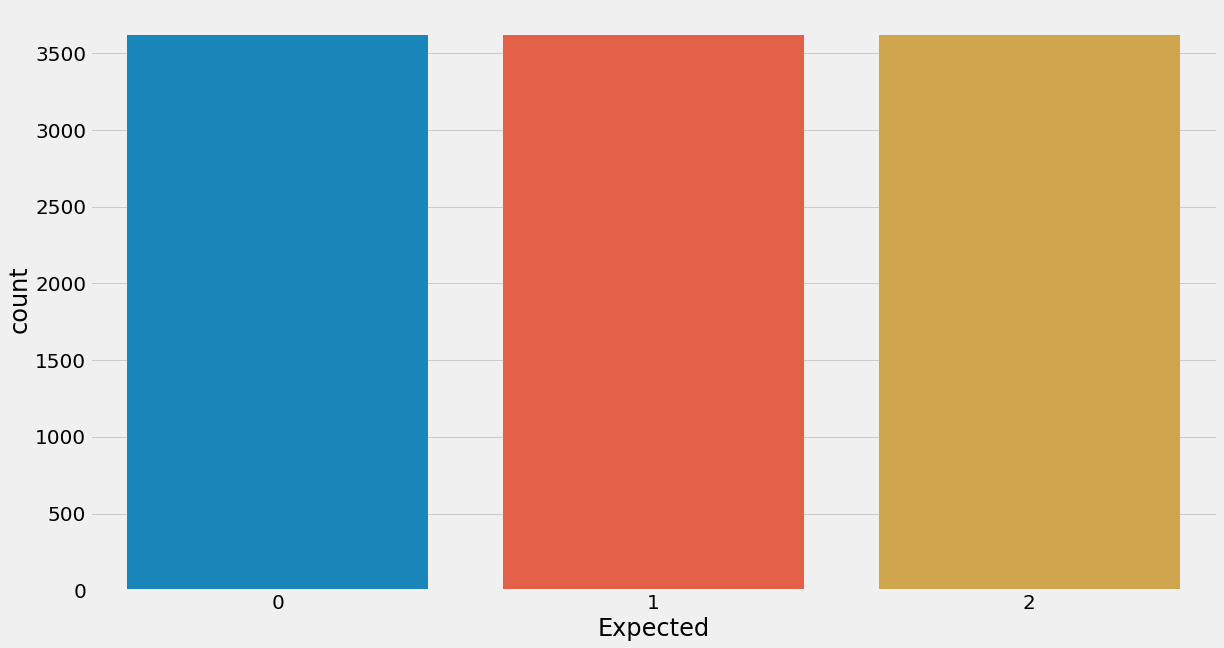

In [72]:
over = SMOTE(sampling_strategy='minority', random_state=42)
X_uo, y_uo = over.fit_resample(X_train, y_train)
rus = RandomUnderSampler(sampling_strategy='not minority', random_state=42)
X_uo, y_uo = rus.fit_resample(X_uo, y_uo)


data_train_uo = X_uo.copy()
data_train_uo['Expected'] = y_uo

sns.countplot(data_train_uo['Expected'],label="Count")
class_0, class_1, class_2 = y_uo.value_counts()
print('Number of class_0 : ',class_0)
print('Number of class_1 : ',class_1)
print('Number of class_2 : ',class_2)

-0.18383085985986394 1.0


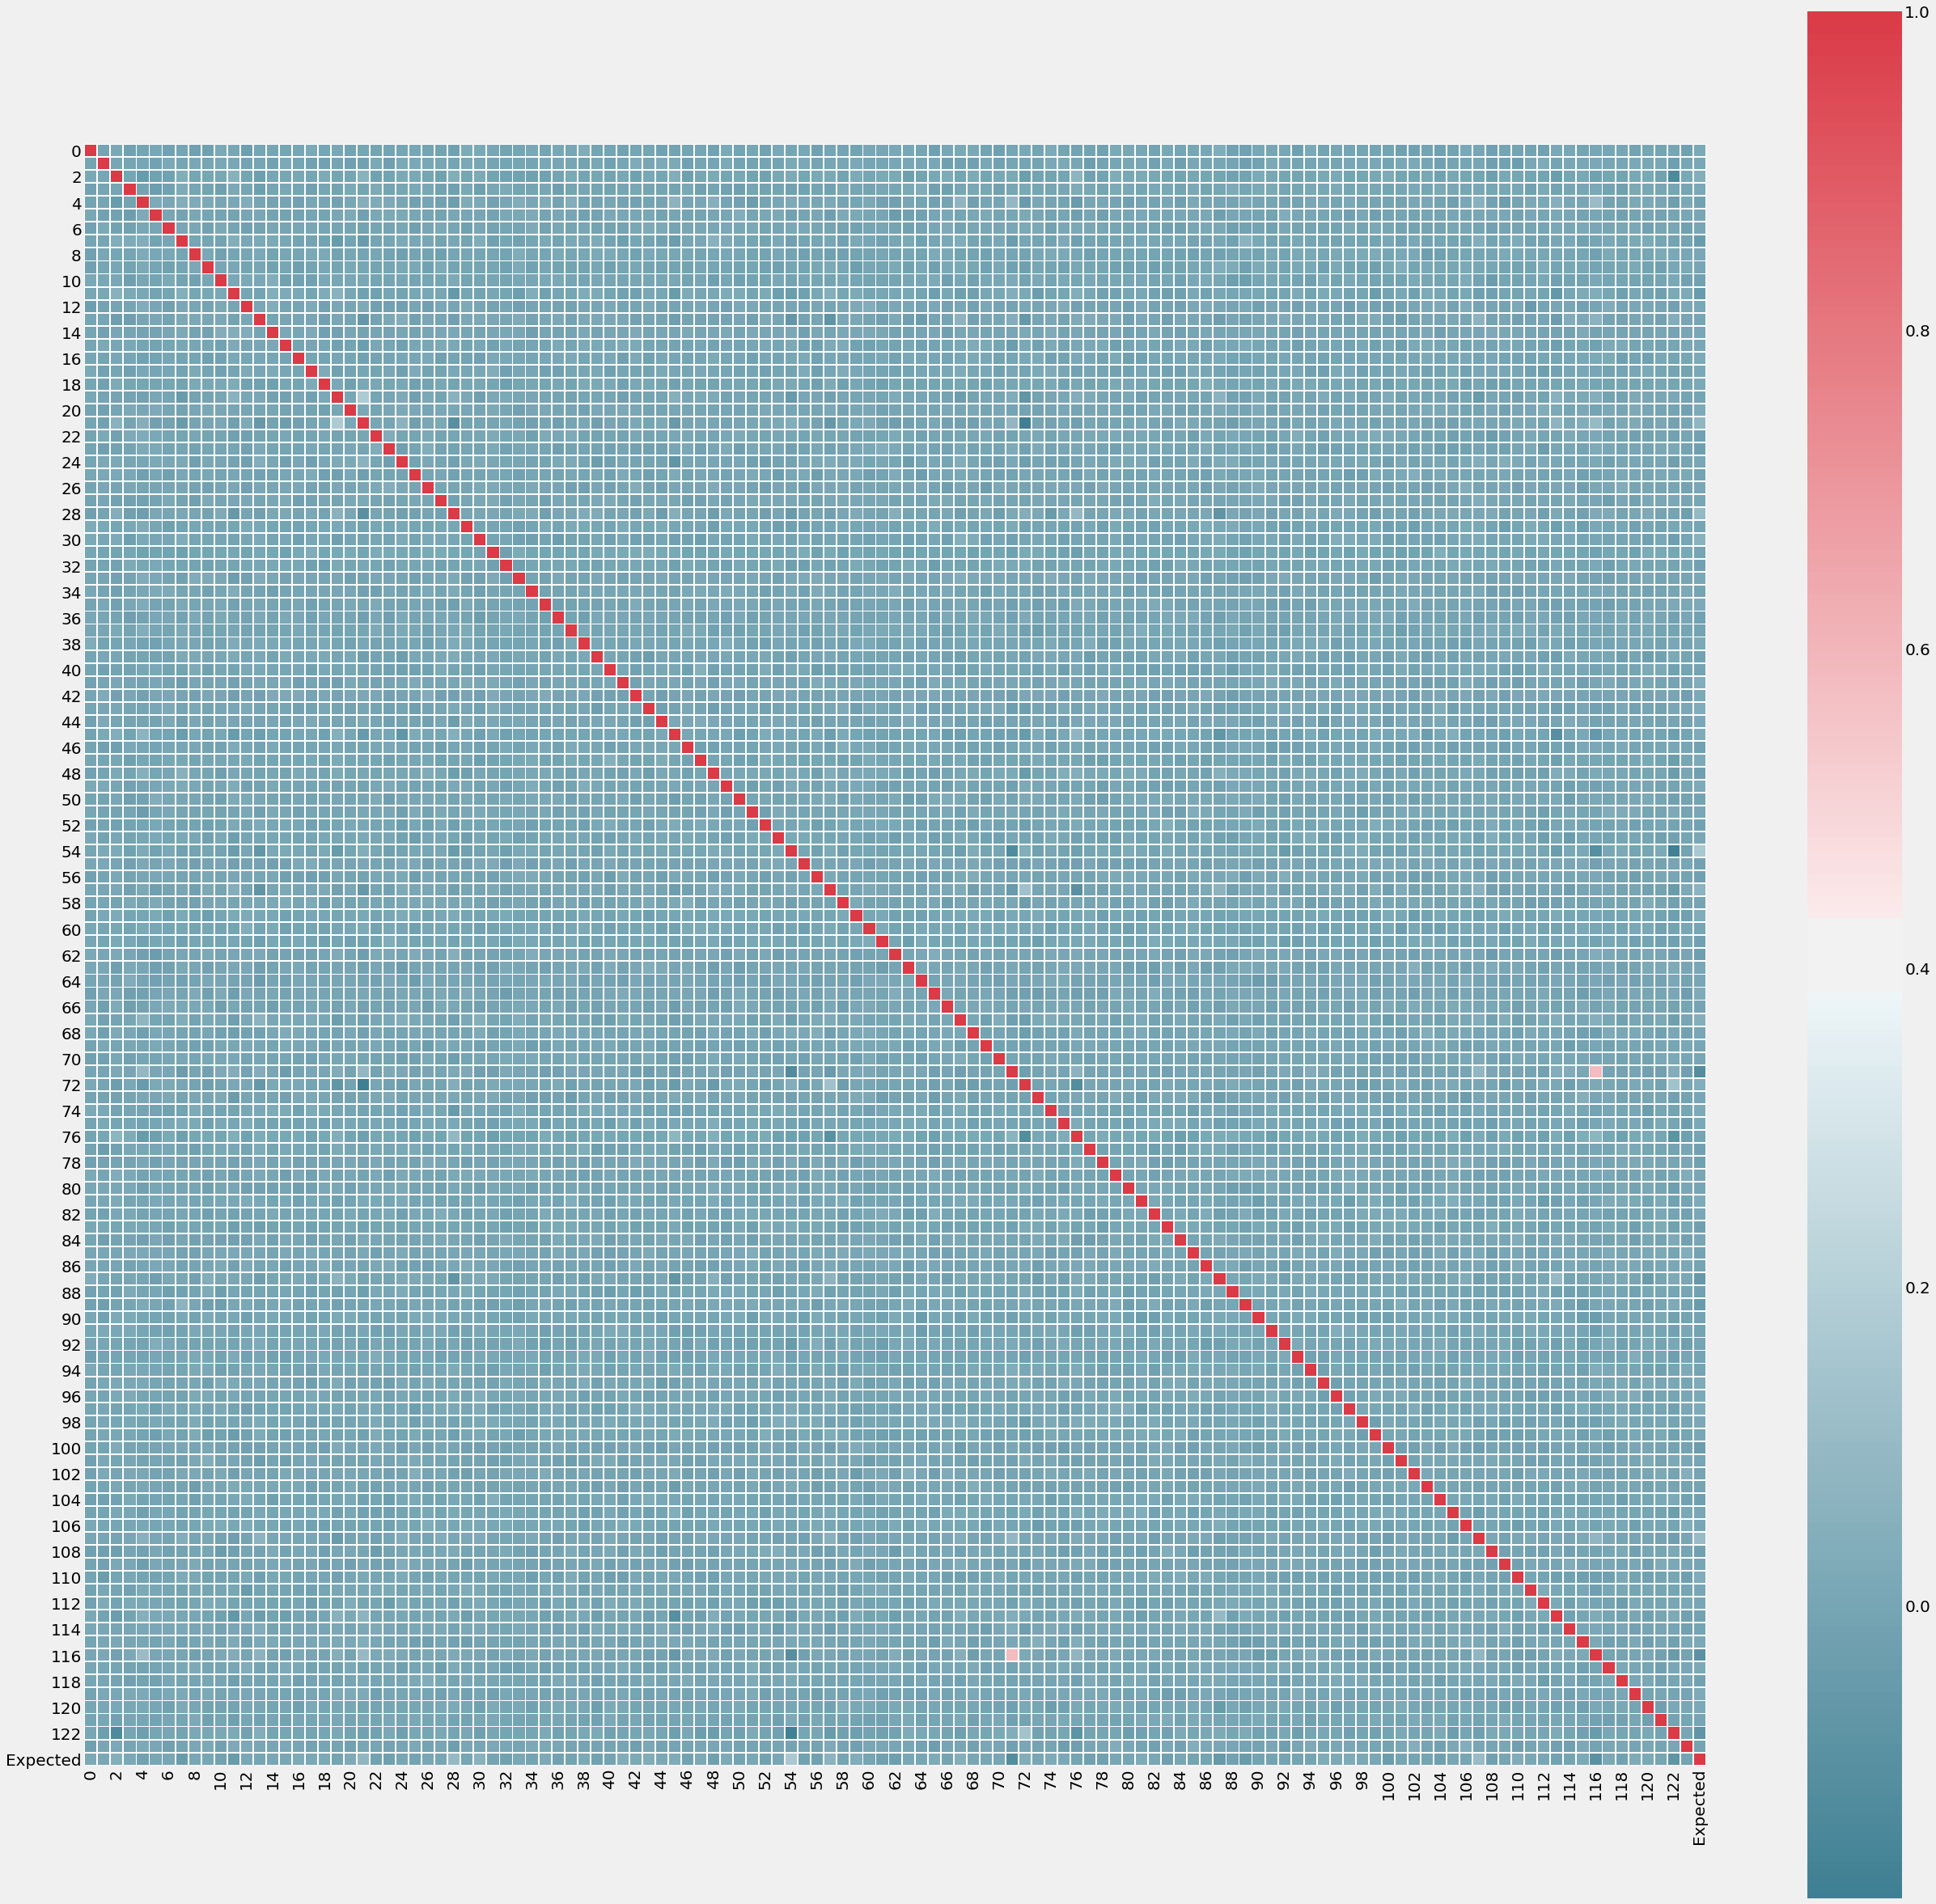

In [95]:
def correlation_heatmap(df):
    corr = df.corr()
    min=corr.min().min()
    max=1.
    print(min, max)
    _, ax = plt.subplots(figsize=(40, 40))
    sns.heatmap(corr, annot=False, fmt='.1f', linewidths=.9, cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax, vmin=min, vmax=max)
    plt.show()
correlation_heatmap(data_train_uo)

In [73]:
cols=['13','57','113','2','72','54','116','76','45','28']
X_train_rgs_uo = X_uo[cols]
y_train_rgs_uo = y_uo.copy()

fit_uo = best_clf.fit(X_train_rgs_uo, y_train_rgs_uo)

learning rate is greater than 1. You probably need to decrease learning rate.


              precision    recall  f1-score   support

           0       0.20      0.47      0.28       285
           1       0.82      0.61      0.70      1834
           2       0.53      0.59      0.56       881

    accuracy                           0.59      3000
   macro avg       0.52      0.55      0.51      3000
weighted avg       0.68      0.59      0.62      3000



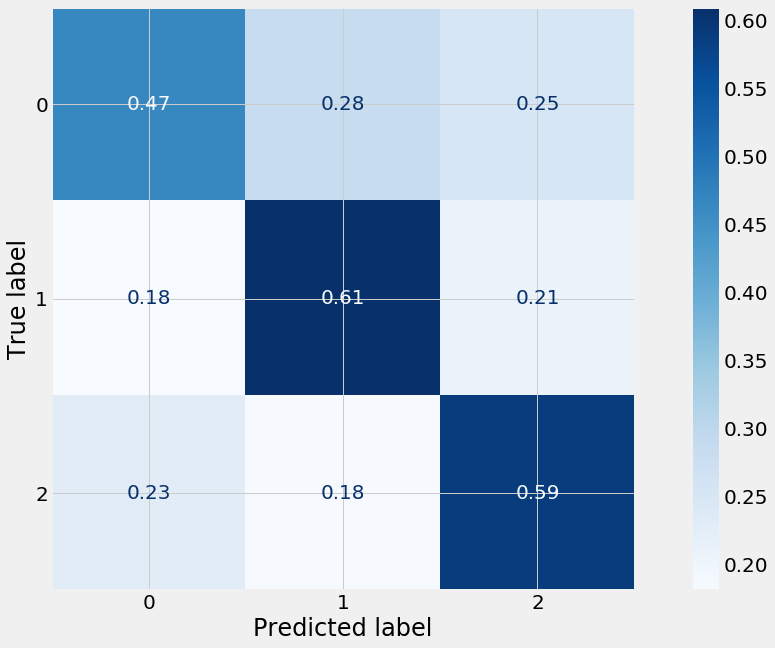

In [74]:
y_pred_rgs_uo = fit_uo.predict(X_validation_rgs) 
print(classification_report(y_validation,y_pred_rgs_uo))

functions.plot_conf_matrix(fit_uo, X_validation_rgs.values, y_validation)

In [82]:
features_test = pd.read_csv('data/features_test.csv')

cols=['13','57','113','2','72','54','116','76','45','28']
X_test = features_test[cols]

y_pred_test = fit_uo.predict(X_test) 



In [87]:
df_pred = pd.DataFrame(y_pred_test, columns=['Predicted']) 
df_pred['Id'] = df_pred.index
df_pred = df_pred[['Id', 'Predicted']]
df_pred.reset_index(drop=True)
df_pred.to_csv('data/prediction_0.csv', index=False)
df_pred.head()

Id  Predicted
0   0          0
1   1          2
2   2          1
3   3          1
4   4          1

In [106]:
cols_sel=[str(x) for x in range(95, 119)]
X_train_rgs_uo = X_uo[cols_sel]
y_train_rgs_uo = y_uo.copy()
X_train_rgs_uo.head()
len(X_train_rgs_uo)

10860

In [107]:
select_K_filter = SelectKBest(f_classif)
clf = RandomForestClassifier()

pipe_2 = Pipeline([('clf', clf)])

In [108]:
K_FEATURES = [5, 10, 20, 50, 100] #uniform(loc=3, scale=20) #list(range(3, 23))
N_ESTIMATORS = [100, 200, 300, 500, 800, 1000]#uniform(loc=10, scale=90) #list(range(10, 300, 1))
LEARNING_RATE =  np.arange(0.1, 2, 0.2).tolist() #uniform(loc=0.001, scale=4.999)#np.arange(0.001, 5, 0.001).tolist()
MAX_DEPTH =  [5, 10, 20, 40]#uniform(loc=1, scale=19) #list(range(1, 20, 1))

params_b = [
    {
        'clf': [RandomForestClassifier(random_state=42, class_weight=class_weight)],
        'clf__max_depth' : MAX_DEPTH,
        'clf__n_estimators' : N_ESTIMATORS        
    },
    {
        'clf': [CatBoostClassifier(random_seed= 42, logging_level='Silent')],
        'clf__n_estimators' : N_ESTIMATORS,
        'clf__depth' : MAX_DEPTH
    }
 ]

# Create a random  search object
#randsearch_b = RandomizedSearchCV(pipe, params_b, cv=5, scoring='f1_macro', n_iter=100, n_jobs=-1, verbose=1)
#randsearch_b.fit(X_uo, y_uo)


In [109]:
grid = GridSearchCV(pipe_2, params_b, cv = 5, scoring = 'f1_macro', refit = 'f1_macro', n_jobs = -1, verbose=1)
grid.fit(X_train_rgs_uo, y_train_rgs_uo)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 71.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                              

In [110]:
grid.best_estimator_

Pipeline(memory=None,
         steps=[('clf',
                 <catboost.core.CatBoostClassifier object at 0x1a389f97d0>)],
         verbose=False)

In [111]:
grid.best_params_

{'clf': <catboost.core.CatBoostClassifier at 0x1a38e99bd0>,
 'clf__depth': 10,
 'clf__n_estimators': 1000}

              precision    recall  f1-score   support

           0       0.10      0.14      0.12       285
           1       0.65      0.51      0.57      1834
           2       0.35      0.46      0.40       881

    accuracy                           0.46      3000
   macro avg       0.37      0.37      0.36      3000
weighted avg       0.51      0.46      0.48      3000



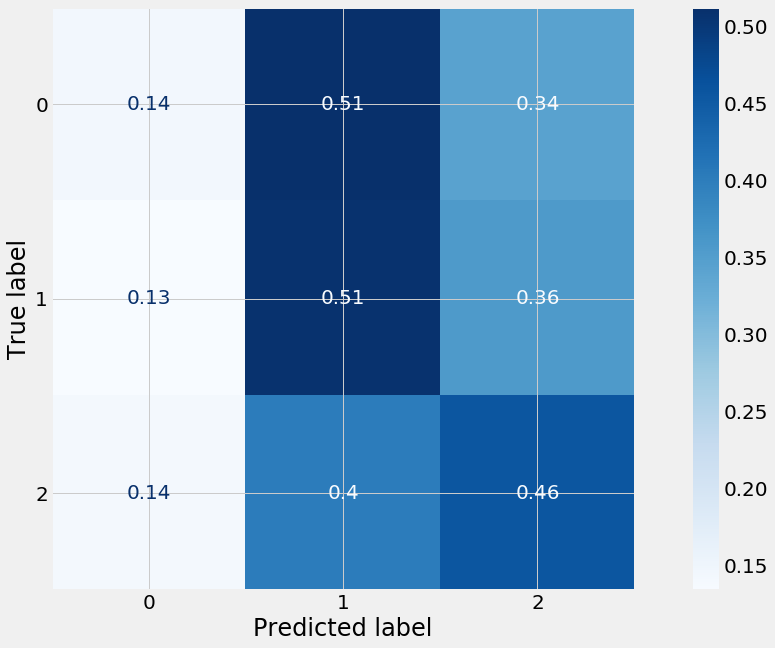

In [113]:
cols_sel=[str(x) for x in range(95, 119)]
X_validation_rgs_uo = X_validation[cols_sel]

y_pred_rgs_uo_2 = grid.best_estimator_.predict(X_validation_rgs_uo) 
print(classification_report(y_validation,y_pred_rgs_uo_2))

functions.plot_conf_matrix(grid.best_estimator_, X_validation_rgs_uo.values, y_validation)

In [ ]:
# precision recall curve
def plot_precision_recall_multiclass(n_classes, y, y_score):
    precision = dict()
    recall = dict()
    thresholds = dict()
    for i in range(n_classes):
        precision[i], recall[i], thresholds[i] = precision_recall_curve(y[:, i], y_score[:, i])
        plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="best")
    plt.title("precision vs. recall curve")
    plt.show()

# precision and recall curve vs threshold
def plot_precision_recall_multiclass(n_classes, y, y_score):
    precision = dict()
    recall = dict()
    thresholds = dict()
    for i in range(n_classes):
        precision[i], recall[i], thresholds[i] = precision_recall_curve(y[:, i], y_score[:, i])
        plt.plot(recall[i], thresholds[i], lw=2, label='class {}'.format(i), color='b')
        plt.plot(precision[i], thresholds[i], lw=2, label='class {}'.format(i), color='r')
        plt.xlabel("threshold")
        plt.ylabel("precision/recall")
        plt.legend(loc="best")
        
        plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="best")
    plt.title("precision vs. recall curve")
    plt.show()


# roc curve
def plot_roc_multiclass(n_classes, y, y_score):
    fpr = dict()
    tpr = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
        plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.legend(loc="best")
    plt.title("ROC curve")
    plt.show()